In [1]:
import re
import requests
import seaborn as sns
import pandas as pd
import numpy as np
from pyquery import PyQuery as pq
from datetime import datetime

url = 'https://lviv.pb.org.ua/projects/'

In [2]:
def parsenum(text):
    clean = re.sub('[^0-9]','', text)
    if clean:
        return int(clean)
    

def parsedoc(doc):
    el = doc('.votes-count')
    votes = parsenum(el.children('strong').text())
    idd = parsenum(doc('.code-num').text())
    if doc('.category').has_class('icon-education'):
        category = 'education'
    else:
        #doc('.category').has_class('icon-other')
        category = 'other'
    amount = parsenum(doc('div.amount strong').text())
    name = doc('.project-info>h1>span:first-child').text()
    voted = doc('.project-info>h1>span.status').has_class('status-voting')
    added = doc('.added>strong').text()
    return {'id':idd,
            'votes':votes,
            'category': category,
            'name': name,
            'voted': voted,
            'added': added,
            'url': url+str(idd),
            'is_big': amount > 600000}


In [4]:
#parse site
def collect_html():
    docs = []
    bads = 0
    i = 1 

    while bads < 30:
        res = requests.get(url+str(i))
        i+=1
        if res.status_code== 200:
            docs.append(res.content)
        else:
            bads+=1
    return docs


In [7]:
def parse_site(docs):
    items = []
    for html in docs:
        doc = pq(html)
        items.append(parsedoc(doc))
    return items

In [5]:
docs = collect_html()


In [10]:
parsed = parse_site(docs)
df = pd.DataFrame(parsed)

In [11]:
df

,id,votes,category,name,voted,added,url,is_big
0,1,2.0,other,"Ремонт та благоустрій тротуару, дорожнього пол...",True,15.08.2021,https://lviv.pb.org.ua/projects/1,False
1,2,272.0,other,"Система відеоспостереження в парку ""Горіховий ...",True,15.08.2021,https://lviv.pb.org.ua/projects/2,True
2,3,NaN,education,Автодром для навчання (водіїв),False,15.08.2021,https://lviv.pb.org.ua/projects/3,True
3,4,39.0,other,Облаштування дитячого майданчика,True,16.08.2021,https://lviv.pb.org.ua/projects/4,False
4,5,69.0,other,Жива вода міста Дублян,True,16.08.2021,https://lviv.pb.org.ua/projects/5,True
...,...,...,...,...,...,...,...,...
249,262,NaN,other,WORKOUT на Білогорщі,False,15.09.2021,https://lviv.pb.org.ua/projects/262,False
250,263,NaN,other,Центр соціально-екологічного життя громади на ...,False,15.09.2021,https://lviv.pb.org.ua/projects/263,False
251,264,5.0,other,ПАРК ПІДГОРИ. Продовження (на розі вулиць Лича...,True,15.09.2021,https://lviv.pb.org.ua/projects/264,False
252,265,1.0,other,Капітальний ремонт дитячого майданчика та нови...,True,15.09.2021,https://lviv.pb.org.ua/projects/265,False


In [ ]:
#TODO Create folders files/html, files/csv

In [13]:
today = datetime.now().strftime('%Y-%m-%d')

for index, record in df.iterrows():
    with open(f'files/html/grom-{record["id"]}-{today}.html', 'w') as file:
        file.write(str(docs[index], 'utf8'))
        

In [15]:
df.to_csv(f'files/csv/data-{today}.csv')

In [9]:

df[df.is_big == True].sort_values('votes', ascending=False)

,id,votes,category,name,voted,added,url,is_big
206,235,7090.0,education,Допоможи дитині здолати рак !,False,15.09.2020,https://lviv.pb.org.ua/projects/235,True
77,98,5209.0,education,Благоустрій території найбільшого в Західній У...,False,11.09.2020,https://lviv.pb.org.ua/projects/98,True
130,155,5021.0,education,"Мистецький простір ""Пулюй"" / Puluj Art Hall",False,14.09.2020,https://lviv.pb.org.ua/projects/155,True
124,149,4651.0,other,Реалізуємо право дорослих з інвалідністю на гі...,False,14.09.2020,https://lviv.pb.org.ua/projects/149,True
195,224,4043.0,education,Капітальний ремонт покриття шкільного подвір’я...,False,15.09.2020,https://lviv.pb.org.ua/projects/224,True
191,220,3913.0,education,Планета дитячого майбутнього,False,15.09.2020,https://lviv.pb.org.ua/projects/220,True
85,107,3870.0,education,"Спортивний майданчик ""Street workout"" ліцею ""Л...",False,12.09.2020,https://lviv.pb.org.ua/projects/107,True
115,140,3813.0,education,"Стадіон ""Сихів"" на території 98 школи",False,14.09.2020,https://lviv.pb.org.ua/projects/140,True
14,23,3304.0,other,Кришталева перлина Голоска і рай для черепах(о...,False,28.08.2020,https://lviv.pb.org.ua/projects/23,True
88,110,3291.0,other,"Відновлення водойм в парку ""Горіховий гай""",False,13.09.2020,https://lviv.pb.org.ua/projects/110,True


In [10]:
files = [       
         'data-2020-11-05.csv',
         'data-2020-11-06.csv',
         'data-2020-11-07.csv',
         'data-2020-11-08.csv',
         'data-2020-11-09.csv',
         'data-2020-11-10.csv',
         'data-2020-11-11.csv',
         'data-2020-11-12.csv',
         'data-2020-11-13.csv',
         'data-2020-11-14.csv',
         'data-2020-11-16.csv']


history_data = pd.DataFrame()

for file in files:
    dat = pd.read_csv('filess/'+file, index_col=0)
    dat['date'] = pd.to_datetime(file[5:15])
    history_data = history_data.append(dat, ignore_index=True)
    

In [11]:
df['name_votes'] = df['votes'].fillna(0).astype(int).astype(str)  + ' : ' + df['name']
hs=history_data[['votes', 'date', 'id']].merge(df.drop(columns=['votes']), on='id' )

In [12]:
top_big = df[df.is_big == True].sort_values('votes', ascending=False)[:10]['id']
top_small = df[df.is_big == False].sort_values('votes', ascending=False)[:10]['id']

top_big_history = hs[hs['id'].isin(top_big)]
top_small_history = hs[hs['id'].isin(top_small)]

In [16]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [17]:
plt=sns.lineplot(data=top_big_history, x='date', y='votes', hue='name_votes', palette="tab10", 
            hue_order=df[df.id.isin(top_big)].sort_values('votes', ascending=False)['name_votes'])

plt.legend(bbox_to_anchor=(0, 1), loc='lower left', borderaxespad=0.1)

In [21]:
df
#df[df.id.isin(top_big)].sort_values('votes', ascending=False)[:5][['name','votes','url', 'amount']]

,id,votes,category,name,voted,added,url,is_big,name_votes
0,3,3139.0,education,Створення інтерактивного простору для дітей з ...,False,17.08.2020,https://lviv.pb.org.ua/projects/3,True,3139 : Створення інтерактивного простору для д...
1,4,NaN,other,Облаштування території між будинками по вул. Б...,False,18.08.2020,https://lviv.pb.org.ua/projects/4,False,0 : Облаштування території між будинками по ву...
2,5,485.0,education,Доріжки з бруківки на території ЗДО № 167,False,18.08.2020,https://lviv.pb.org.ua/projects/5,False,485 : Доріжки з бруківки на території ЗДО № 167
3,6,NaN,other,Створення сучасної науково-дослідної реставрац...,False,18.08.2020,https://lviv.pb.org.ua/projects/6,True,0 : Створення сучасної науково-дослідної реста...
4,7,90.0,education,"Інфраструктура , благоустрій та озеленення гро...",False,20.08.2020,https://lviv.pb.org.ua/projects/7,False,"90 : Інфраструктура , благоустрій та озелененн..."
...,...,...,...,...,...,...,...,...,...
235,265,423.0,other,ПАРК «ПІДГОРИ» (на розі вулиць Личаківська - Б...,False,15.09.2020,https://lviv.pb.org.ua/projects/265,False,423 : ПАРК «ПІДГОРИ» (на розі вулиць Личаківсь...
236,266,437.0,other,Затишний дворик Коломийська 19 - Кавалерідзе 16,False,15.09.2020,https://lviv.pb.org.ua/projects/266,False,437 : Затишний дворик Коломийська 19 - Кавалер...
237,267,NaN,education,"""Здорова молодь"". Облаштування спортивного май...",False,15.09.2020,https://lviv.pb.org.ua/projects/267,False,"0 : ""Здорова молодь"". Облаштування спортивного..."
238,268,185.0,education,"""Світло-музичний фонтан на Топольній""",False,15.09.2020,https://lviv.pb.org.ua/projects/268,True,"185 : ""Світло-музичний фонтан на Топольній"""


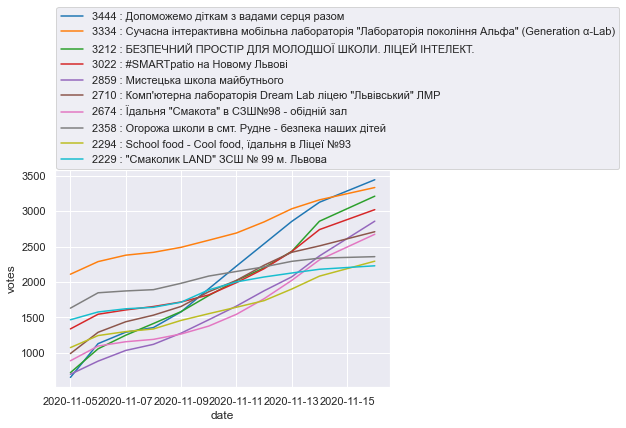

In [15]:
plt=sns.lineplot(data=top_small_history, x='date', y='votes', hue='name_votes', palette="tab10", 
            hue_order=df[df.id.isin(top_small)].sort_values('votes', ascending=False)['name_votes'])

plt.legend(bbox_to_anchor=(0, 1), loc='lower left', borderaxespad=0.1)